# Nama: Leta Lestari

### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [1]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis (EDA)

In [3]:
# Exploratory Data Analysis
print(df.head())
print(df.describe())
print(df.info())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None


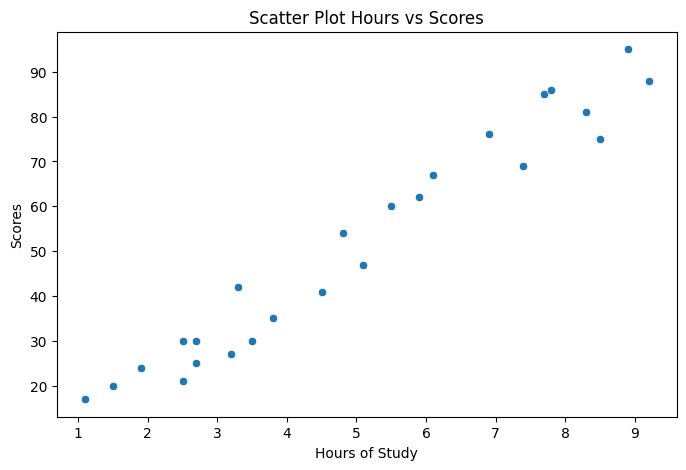

In [4]:
# Visualisasi Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.title('Scatter Plot Hours vs Scores')
plt.show()

## Feature Engineering

In [5]:
# Check Duplicated Data
duplicates = df.duplicated().sum()
print(f'Duplicated Rows: {duplicates}')

Duplicated Rows: 0


In [6]:
# Check Missing Values
missing_values = df.isnull().sum()
print(f'Missing Values:\n{missing_values}')

Missing Values:
Hours     0
Scores    0
dtype: int64


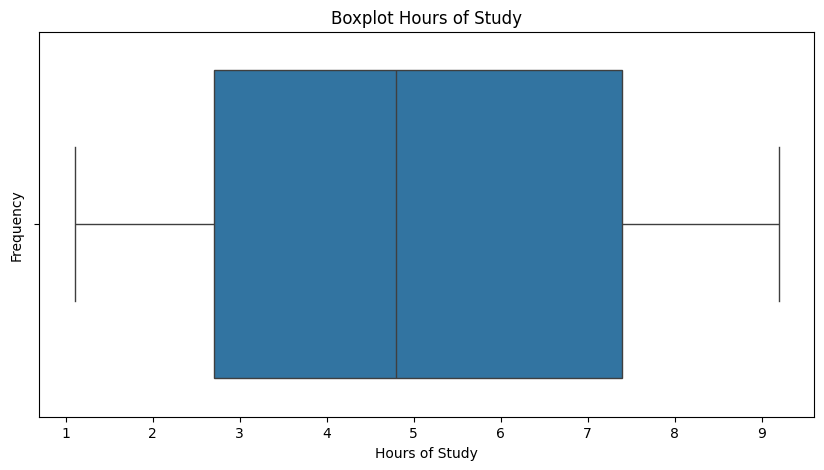

In [7]:
# Outlier Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='Hours', data=df)
plt.xlabel('Hours of Study')
plt.ylabel('Frequency')
plt.title('Boxplot Hours of Study')
plt.show()

## Splitting Data & Scaling

In [17]:
X = df[['Hours']]
y = df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling Machine Learning Regression

In [10]:
# Model Training & Prediction
def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [11]:
# Instantiate models
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [12]:
# Train & Predict
y_pred_lin = train_and_predict(lin_reg, X_train_scaled, y_train, X_test_scaled)
y_pred_dt = train_and_predict(dt_reg, X_train_scaled, y_train, X_test_scaled)
y_pred_rf = train_and_predict(rf_reg, X_train_scaled, y_train, X_test_scaled)

## Evaluasi Model

In [13]:
# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'\nEvaluasi Model: {model_name}')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'R2 Score: {r2:.4f}')
    return r2

In [14]:
# evaluation of each model
eval_lin = evaluate_model(y_test, y_pred_lin, "Linear Regression")
eval_dt = evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")
eval_rf = evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Evaluasi Model: Linear Regression
MAE: 3.9208
MSE: 18.9432
R2 Score: 0.9678

Evaluasi Model: Decision Tree Regressor
MAE: 5.4000
MSE: 31.7000
R2 Score: 0.9461

Evaluasi Model: Random Forest Regressor
MAE: 3.4020
MSE: 18.6880
R2 Score: 0.9682


## Visualisasi Hasil Prediksi

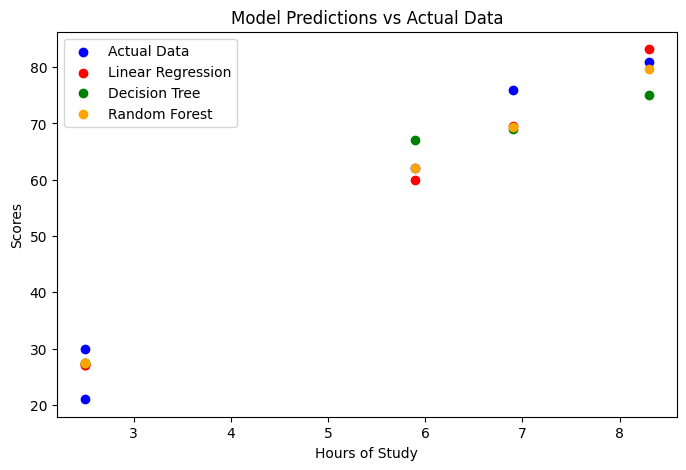

In [15]:
# visualization of prediction results
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_lin, color='red', label='Linear Regression')
plt.scatter(X_test, y_pred_dt, color='green', label='Decision Tree')
plt.scatter(X_test, y_pred_rf, color='orange', label='Random Forest')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.title('Model Predictions vs Actual Data')
plt.legend()
plt.show()

In [18]:
# Best model conclusion
best_model = max([(eval_lin, "Linear Regression"),
                  (eval_dt, "Decision Tree Regressor"),
                  (eval_rf, "Random Forest Regressor")], key=lambda x: x[0])

print(f'\nThe Best Model is {best_model[1]} with R² Score: {best_model[0]:.4f}')


The Best Model is Random Forest Regressor with R² Score: 0.9682
